In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [40]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [41]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [42]:
df.shape

(11251, 15)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11251.0,1.003004e+06,1716.125402,1000001.0,1001492.0,1003065.0,1004430.0,1006040.0
Age,11251.0,3.542121e+01,12.754122,12.0,27.0,33.0,43.0,92.0
Marital_Status,11251.0,4.203182e-01,0.493632,0.0,0.0,0.0,1.0,1.0
Orders,11251.0,2.489290e+00,1.115047,1.0,1.5,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355869,188.0,5443.0,8109.0,12675.0,23952.0
Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unnamed1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Delete Blank columns
df.drop(columns=['Status','unnamed1'],axis=1,inplace=True)

In [46]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [47]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [48]:
# percentage of null values
(df['Amount'].isnull().sum())*100/(df.shape[0])


0.10665718602790863

In [49]:
# so the percentage of null values is very low i can rop null values
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [51]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [54]:
 # Now i will change the data type of amount
df['Amount'] = df['Amount'].astype('int')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


## i have cleaned my data now come to eda

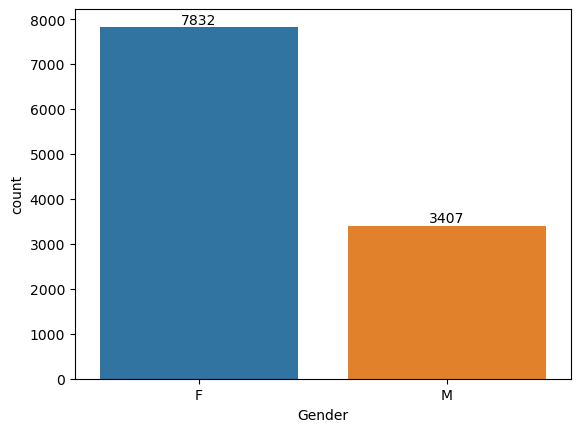

In [58]:
# Gender 
ax = sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [60]:
df.groupby(['Gender'])['Amount'].sum()

Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

In [64]:
Gender_Sales=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

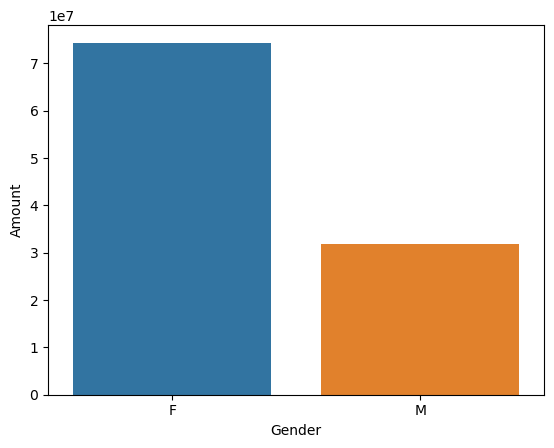

In [65]:
sns.barplot(x='Gender',y='Amount',data=Gender_Sales)

From th above analysis i can conclude that Females are purchasing more than Male and the sales generated by the females is more
the male

In [66]:
# Age
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

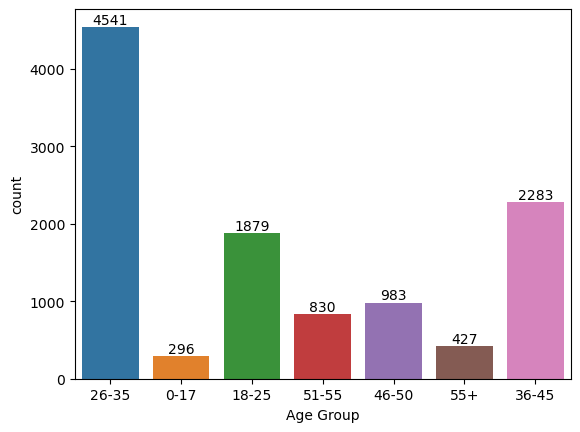

In [80]:
ax = sns.countplot(x='Age Group',data =df)

for bars in ax.containers:
    ax.bar_label(bars)
        

Conslusion = Most of the customers are from age group 26-35

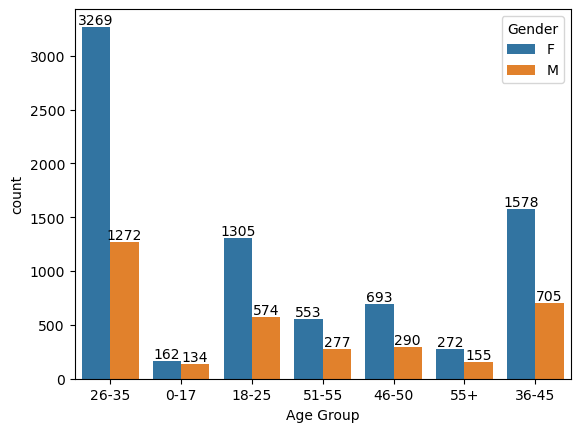

In [82]:
ax = sns.countplot(x='Age Group',data =df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)
        

Again in every age group womens are more than mens

In [86]:
 df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount')

,Age Group,Amount
0,0-17,2699653
6,55+,4080987
5,51-55,8261477
4,46-50,9207844
1,18-25,17240732
3,36-45,22144994
2,26-35,42613442


In [84]:
# Total Amount va age group

AgeGroupSales = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount')

<Axes: xlabel='Age Group', ylabel='Amount'>

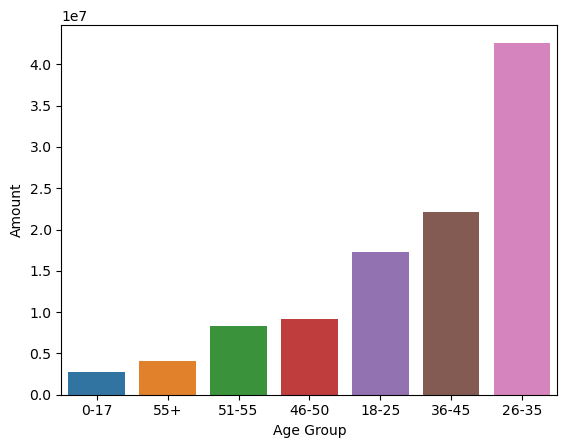

In [85]:
sns.barplot(x='Age Group',y='Amount',data=AgeGroupSales)

Maximum Amount was generated from People whose age ranges between 26 to 35 

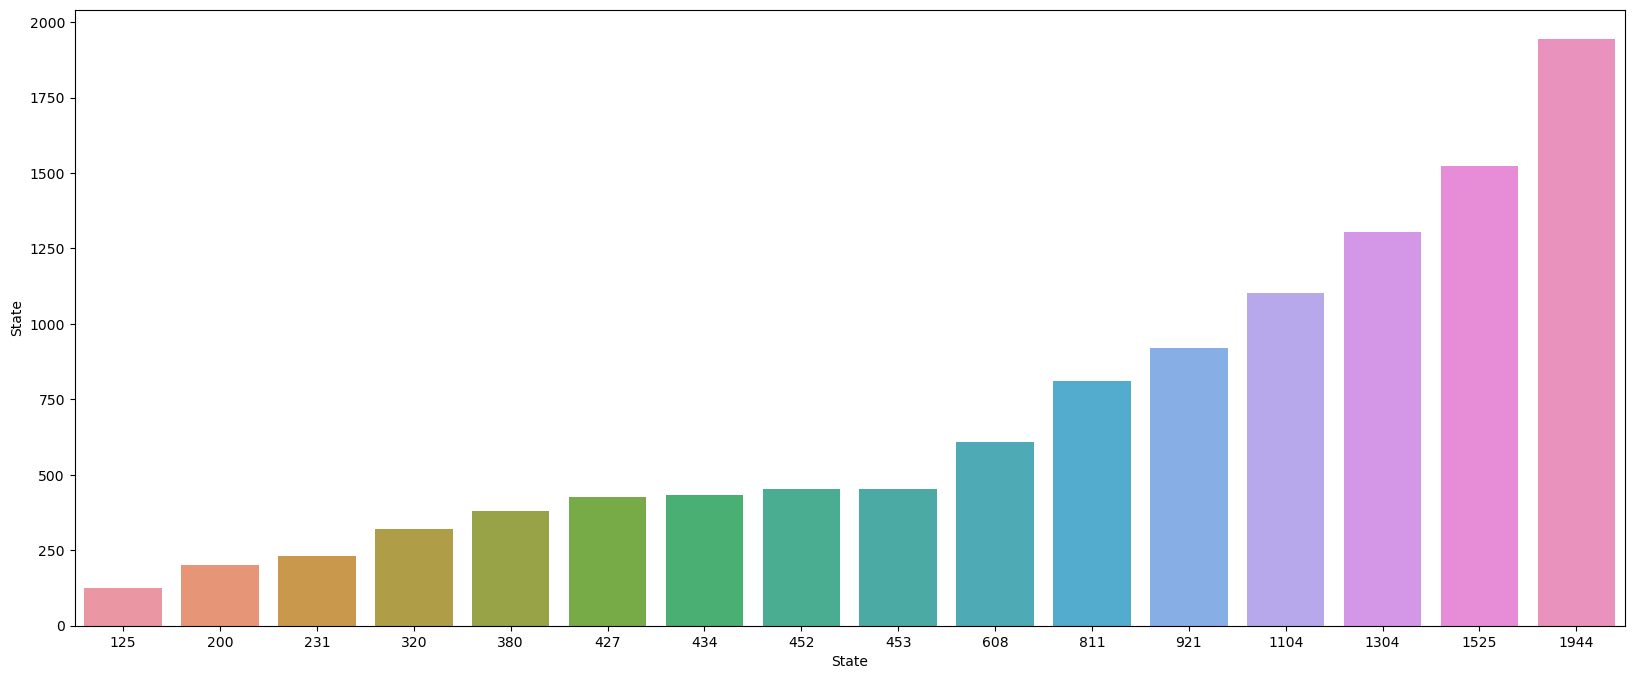

In [102]:
# State
plt.figure(figsize=(20,8))
counted = df.groupby(['State'],as_index=False)['State'].count()
ax=sns.barplot(x='State',y='State',data=counted)



In [100]:
df.groupby(['State'],as_index=False)['State'].count().sort_values(by='State',ascending=False)

,State
14,1944
10,1525
7,1304
2,1104
9,921
0,811
5,608
8,453
4,452
1,434


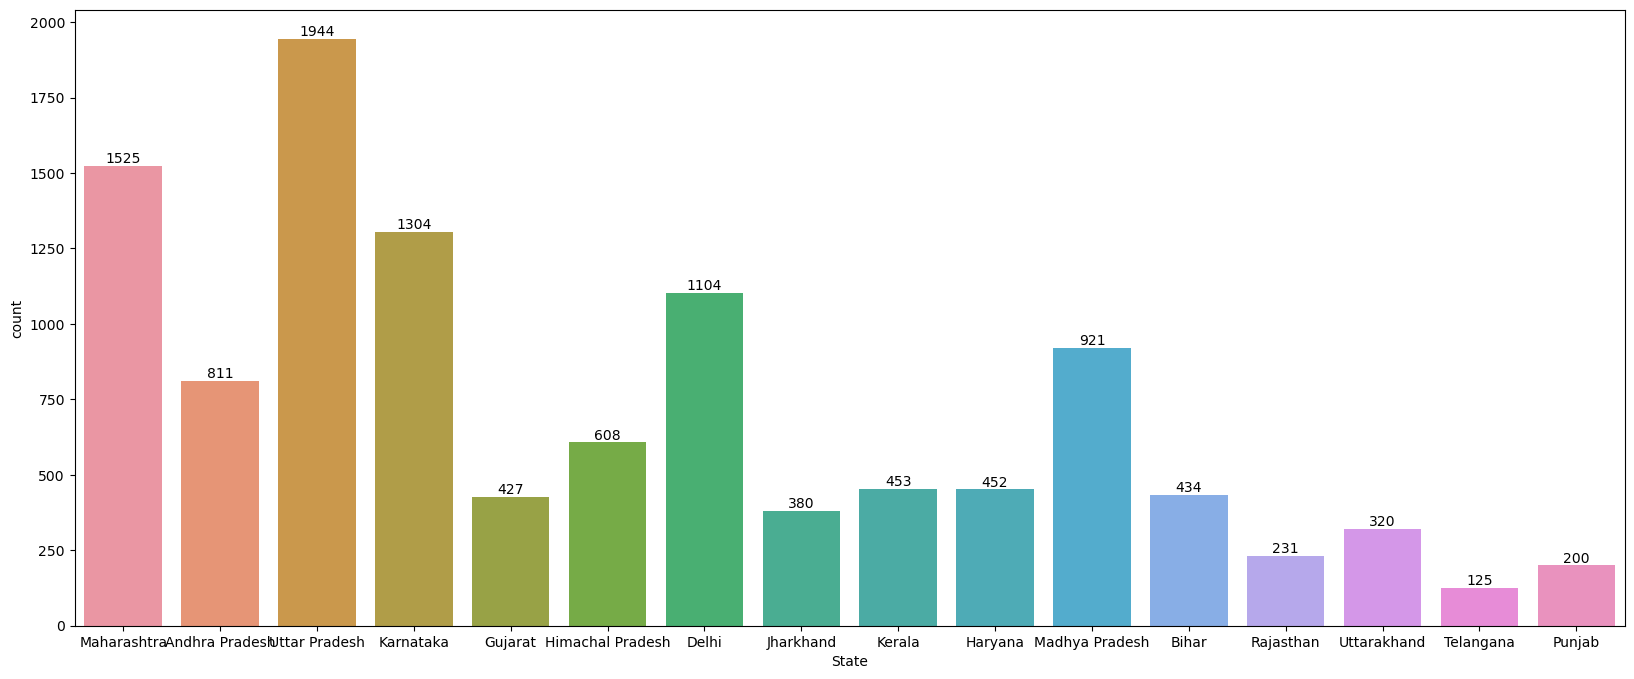

In [105]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='State',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [106]:
# State vs Orders
StateAmount = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

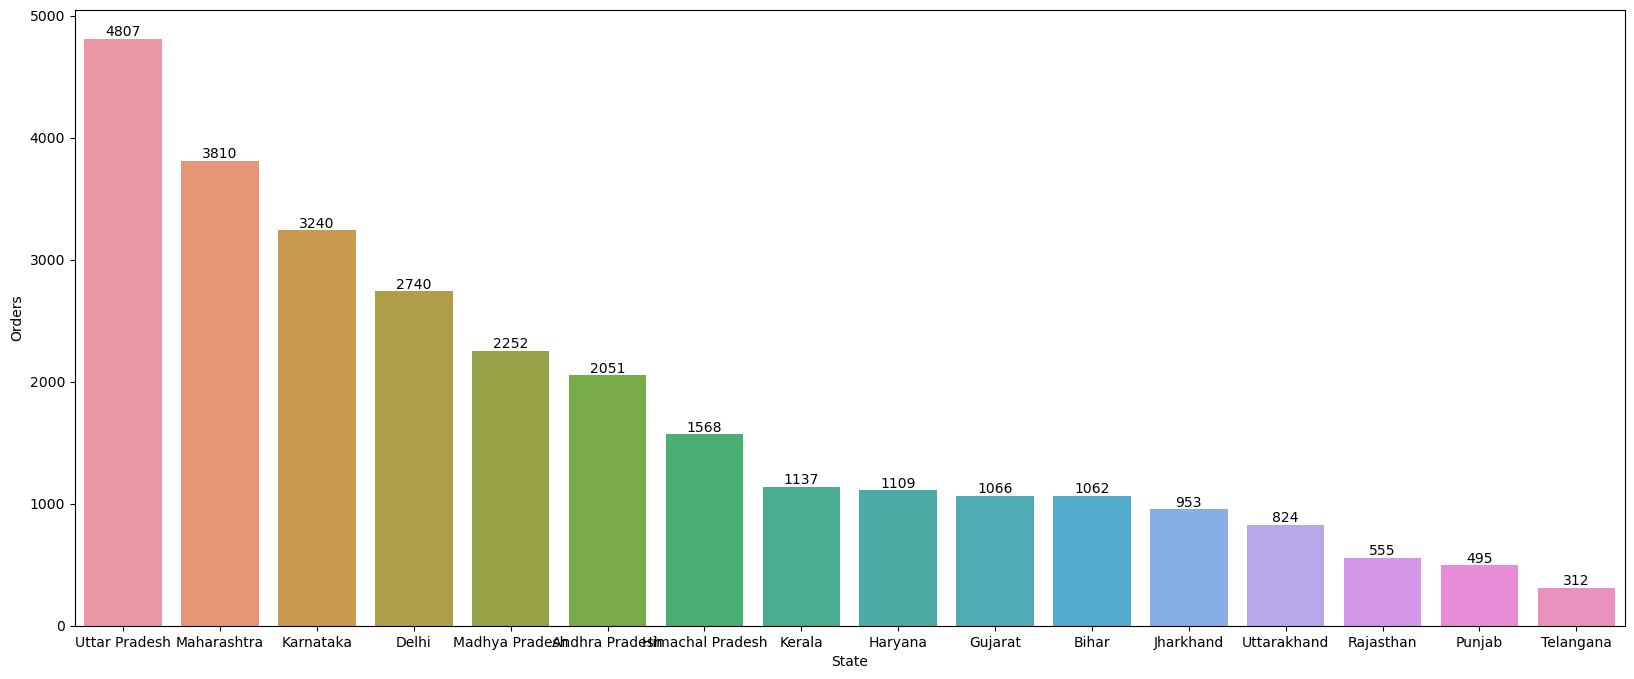

In [109]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='State',y='Orders',data=StateAmount)
for bars in ax.containers:
    ax.bar_label(bars)

UttarPradesh ordered maximum number of orders

In [116]:
# State vs Amount
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Amount'>

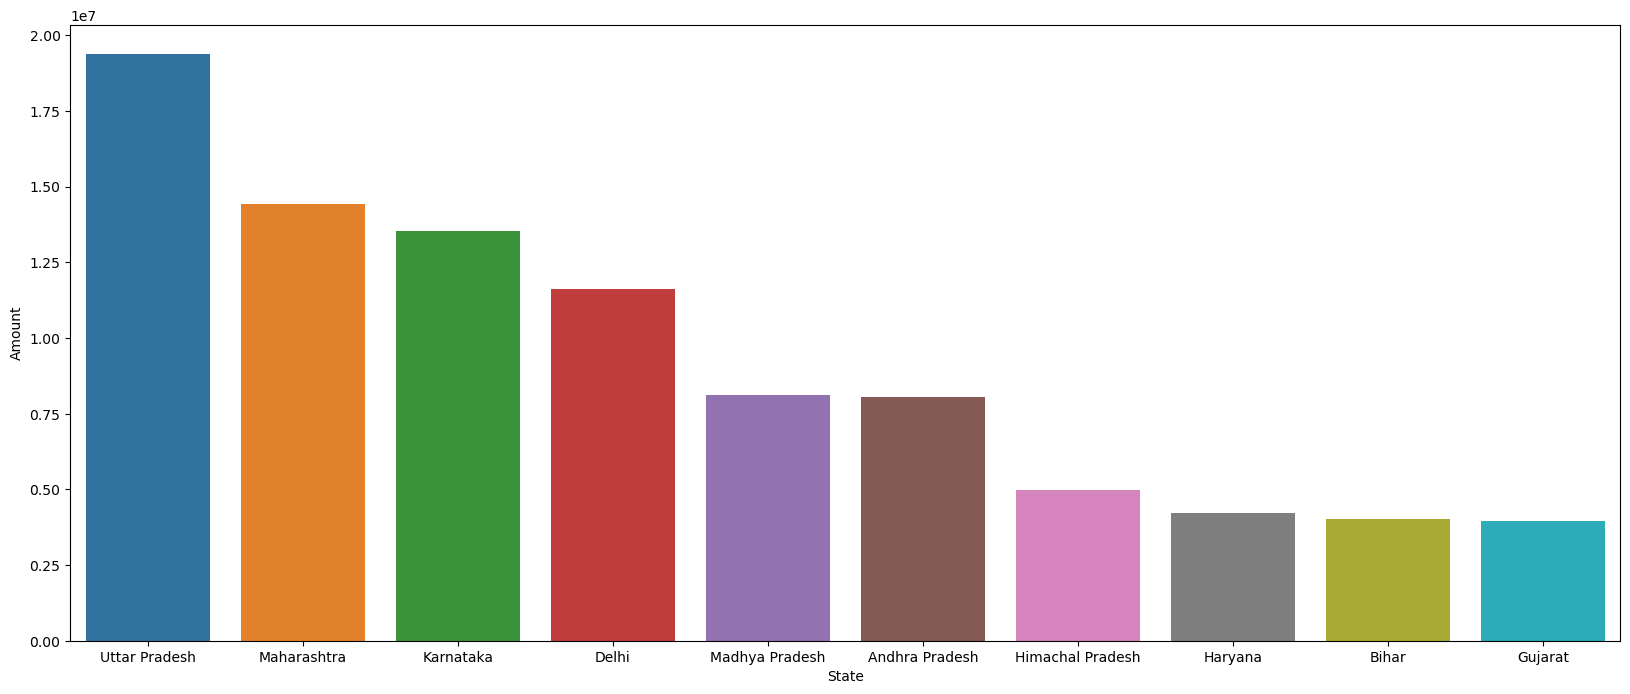

In [118]:
# Top 10 States according to sales
plt.figure(figsize=(20,8))
sns.barplot(x='State',y='Amount',data=sales_state)

From Sales pov UP,MH and Karnataka are top three and from orders POV thr scenario is same

In [119]:
# Marital Status
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


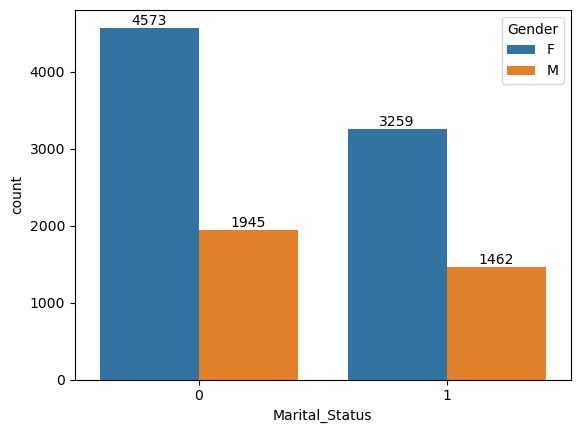

In [131]:
ax=sns.countplot(x='Marital_Status',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [129]:
df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


In [126]:
Sales_Marital = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

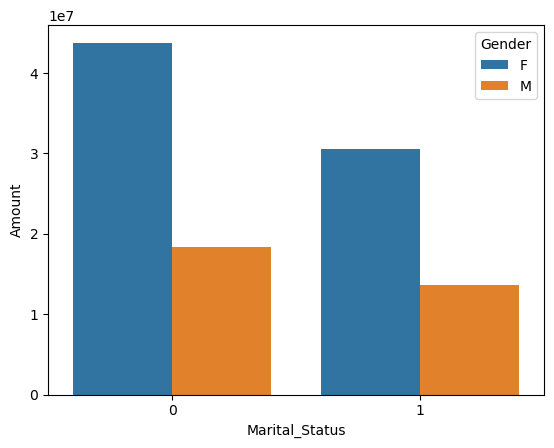

In [128]:
sns.barplot(x='Marital_Status',y='Amount',data=Sales_Marital,hue='Gender')

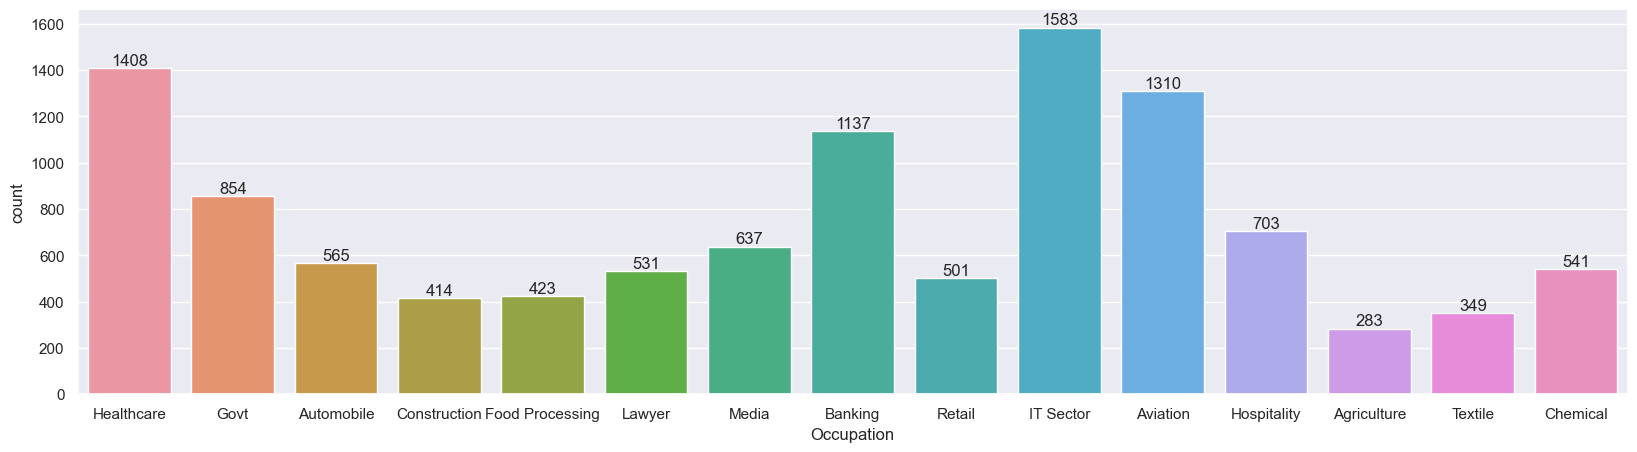

In [134]:
# Occupation

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

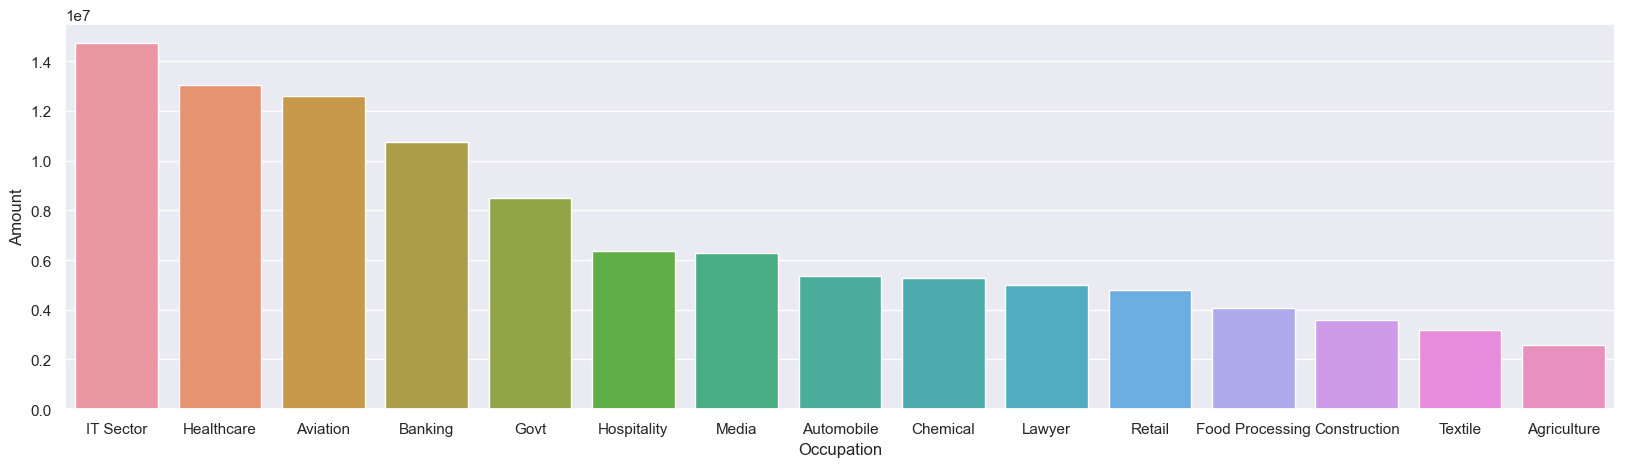

In [140]:
select_occ = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=select_occ,x='Occupation',y='Amount')

Top Three Sales Contributors Are From IT Sector , HealthCare and Aviation

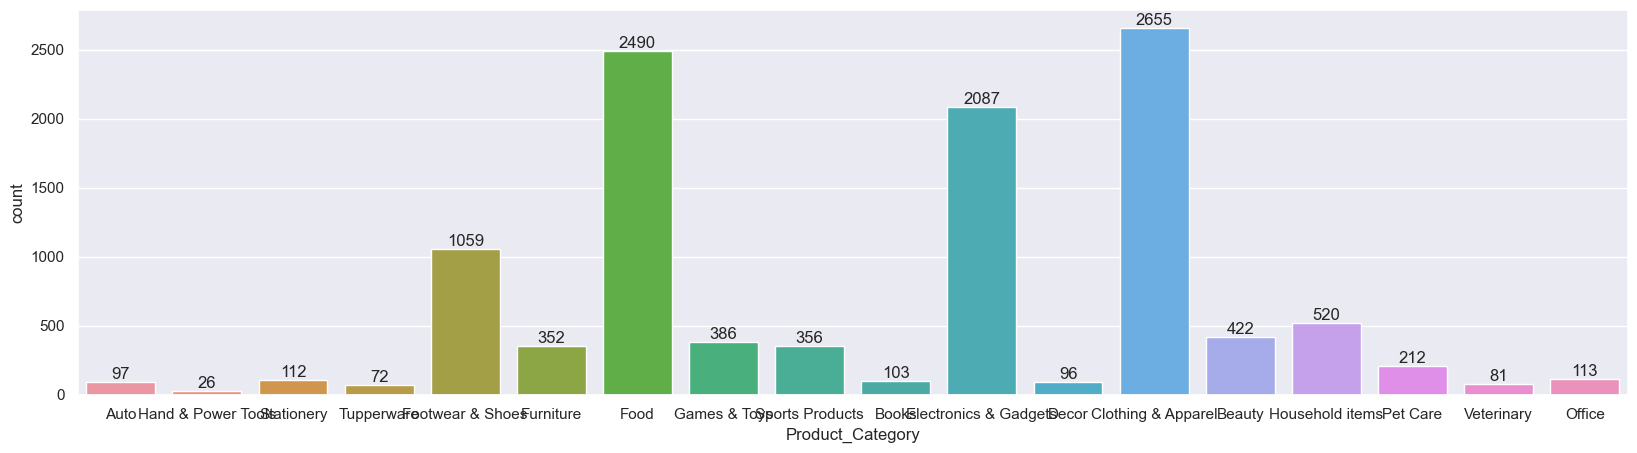

In [141]:
# Product Category

ax = sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [142]:
sales = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

<Axes: xlabel='Product_Category', ylabel='Amount'>

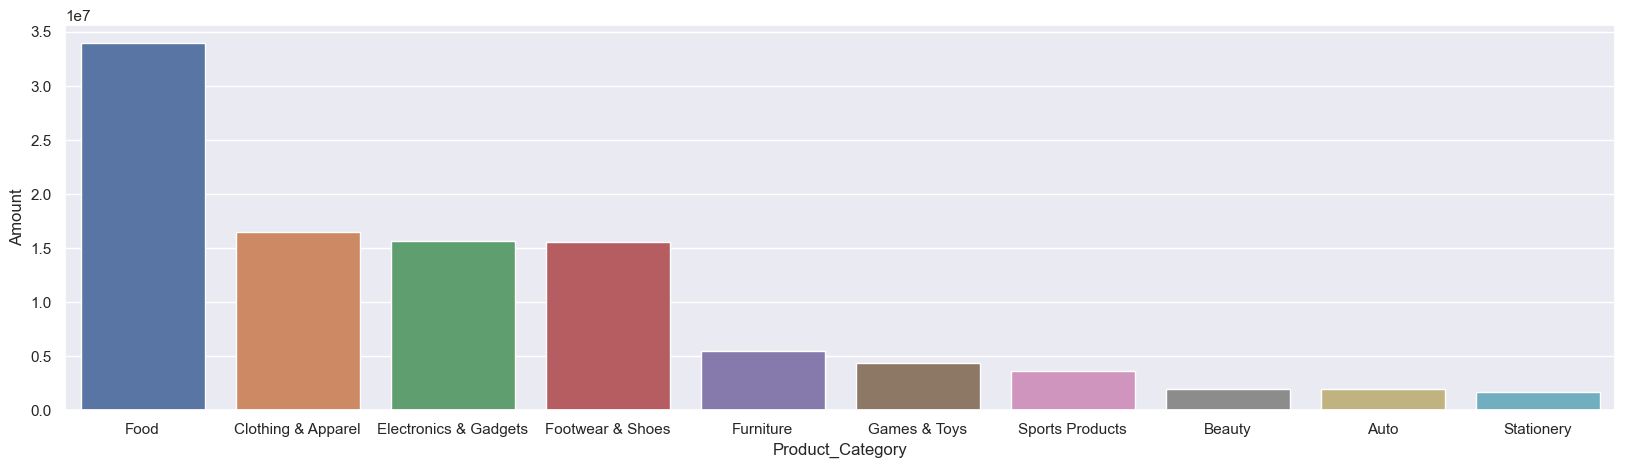

In [143]:
sns.barplot(x='Product_Category',y='Amount',data=sales)

from above analysis we can see that most of the sold products are from food,clothing and electronics category

In [145]:
sales = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

<Axes: xlabel='Product_ID', ylabel='Orders'>

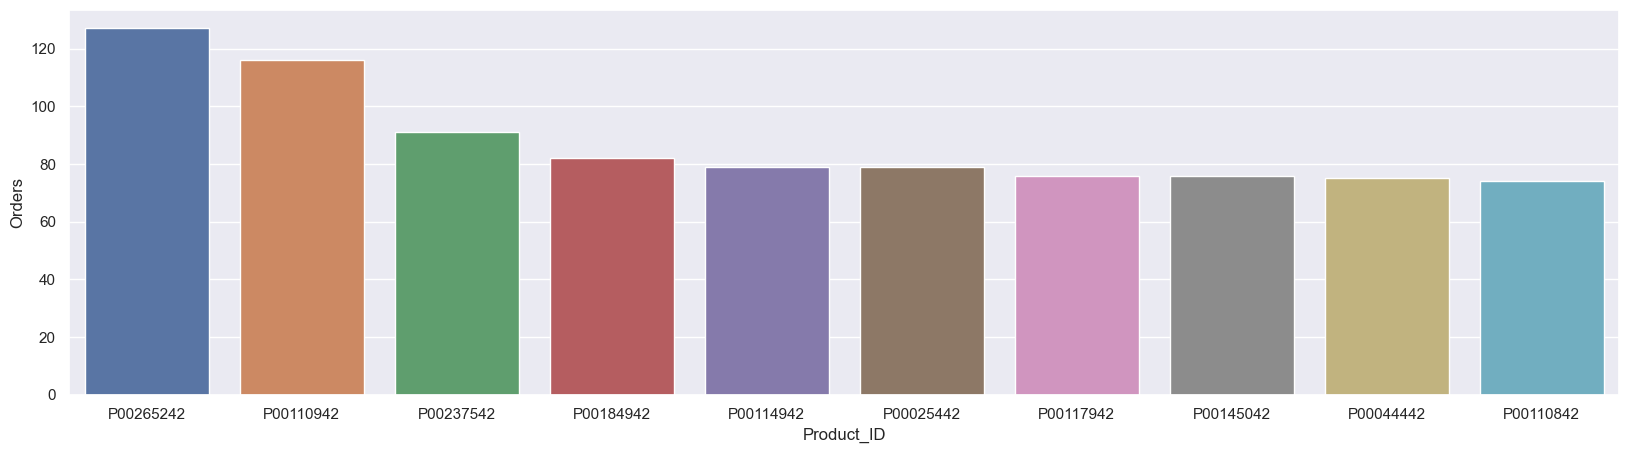

In [146]:
sns.barplot(data=sales,x='Product_ID',y='Orders')

# Conclusions
Married Womwn age gruup 26-35 yrs from UP,MH and Karnataka working in IT,Aviation and Healthcare are more likely to buy food ,clothing and electronics category